# Классификация нуклеотидов на принадлежность к неканоническим спариваниям с помощью Random Forest

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from f723.tools.models.application import group_k_fold
from f723.tools.dataset.features import NucleotideFeaturesExtractor, FeatureVector
from f723.tools.dataset.transformers import join_features, pack_neighbours
from f723.tools.show.classification import show_classification_result
from f723.tools.show.classification import plot_precision_recall_curve

from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

Соберем все понуклеотидные фичи. Пока только для 1 нуклеотида. Не будем включать в фичи его соседей.

In [3]:
nfe = NucleotideFeaturesExtractor(
    nrlist_path='/home/mikhail/bioinformatics/data/nrlist_3.76_3.0A.csv', 
    cif_dir='/home/mikhail/bioinformatics/data/NR_3.0/cif/', 
    out_dir='/home/mikhail/bioinformatics/data/NR_3.0/out/', 
    sec_struct_dir='/home/mikhail/bioinformatics/data/sec_struct', 
    chains_for_classification_path='/home/mikhail/bioinformatics/data/chains_for_classification.json', 
    max_pair_dist=60)

In [4]:
nucleotide_feature_vector = nfe.make_dataset()

100%|██████████| 341/341 [00:48<00:00,  7.00it/s]


In [5]:
feature_vector = join_features(nucleotide_feature_vector)

In [6]:
def make_model():
    return RandomForestClassifier(class_weight='balanced', n_estimators=100, n_jobs=8)

In [7]:
classification_result = group_k_fold(make_model, feature_vector)

(array([0.87417293, 0.65280172]), array([0.82872634, 0.72970369]), array([0.8508432 , 0.68911387]), array([9406, 4151]))
(array([0.88328111, 0.67440347]), array([0.84021716, 0.74879576]), array([0.86121113, 0.70965533]), array([9394, 4152]))
(array([0.86460505, 0.72832487]), array([0.84800636, 0.75420521]), array([0.85622527, 0.74103915]), array([8803, 4756]))
(array([0.87647878, 0.71197083]), array([0.84163047, 0.76746725]), array([0.85870121, 0.73867815]), array([8979, 4580]))
(array([0.87869397, 0.71517028]), array([0.86040967, 0.74688222]), array([0.8694557 , 0.73068233]), array([9227, 4330]))


precision_recall_fscore_support
(array([0.87552102, 0.69704663]), array([0.84369884, 0.74987482]), array([0.85931542, 0.72249633]), array([45809, 21969]))


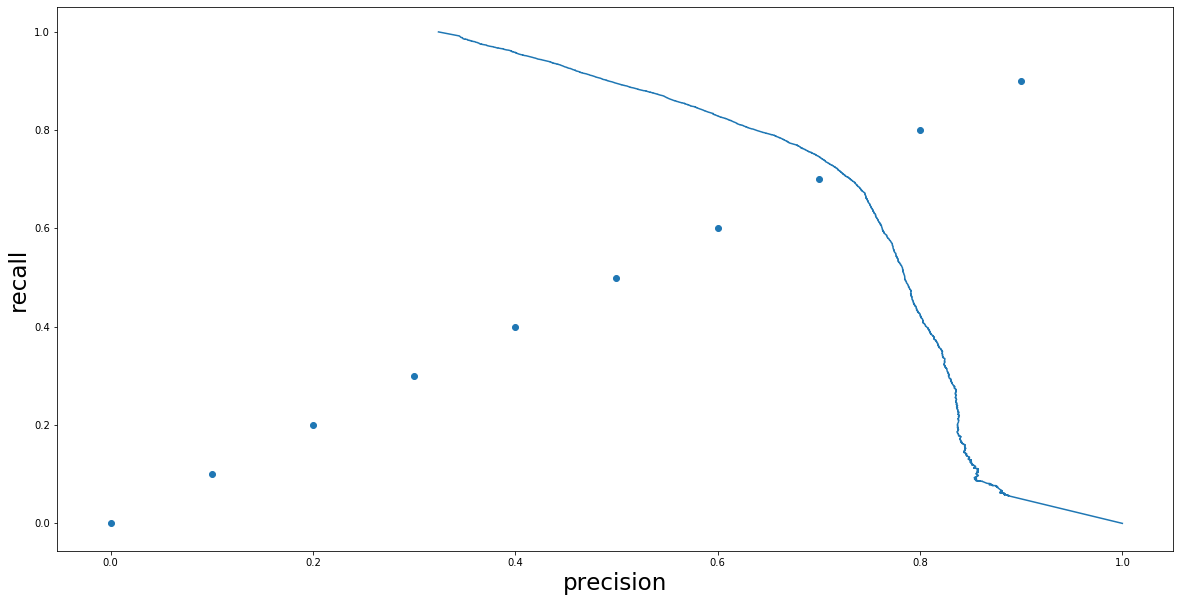

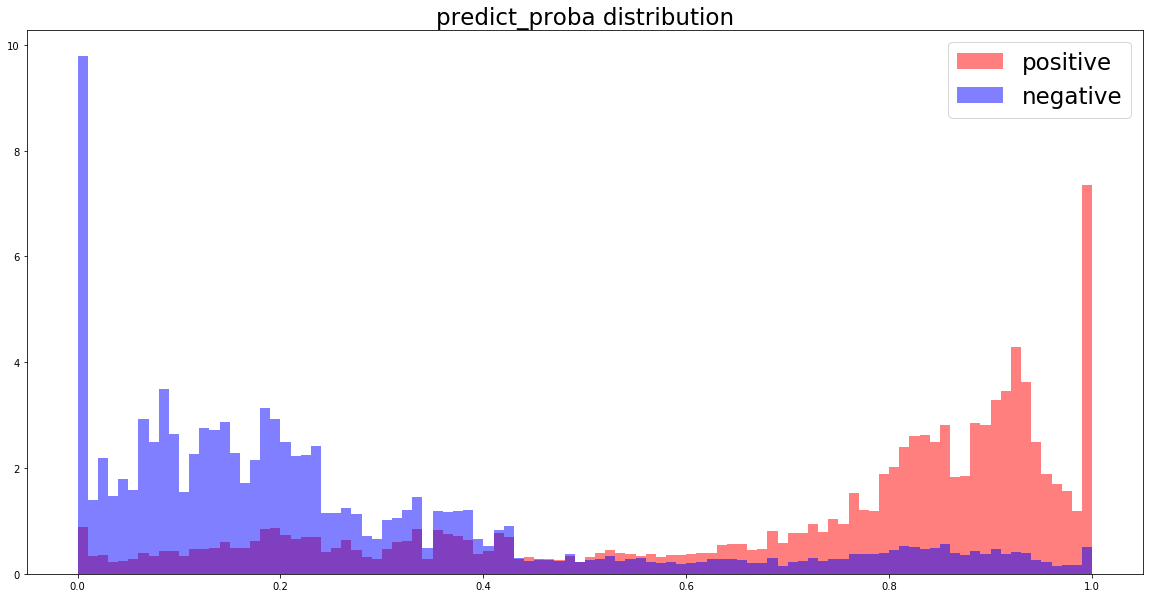

roc auc
0.8541355022433963


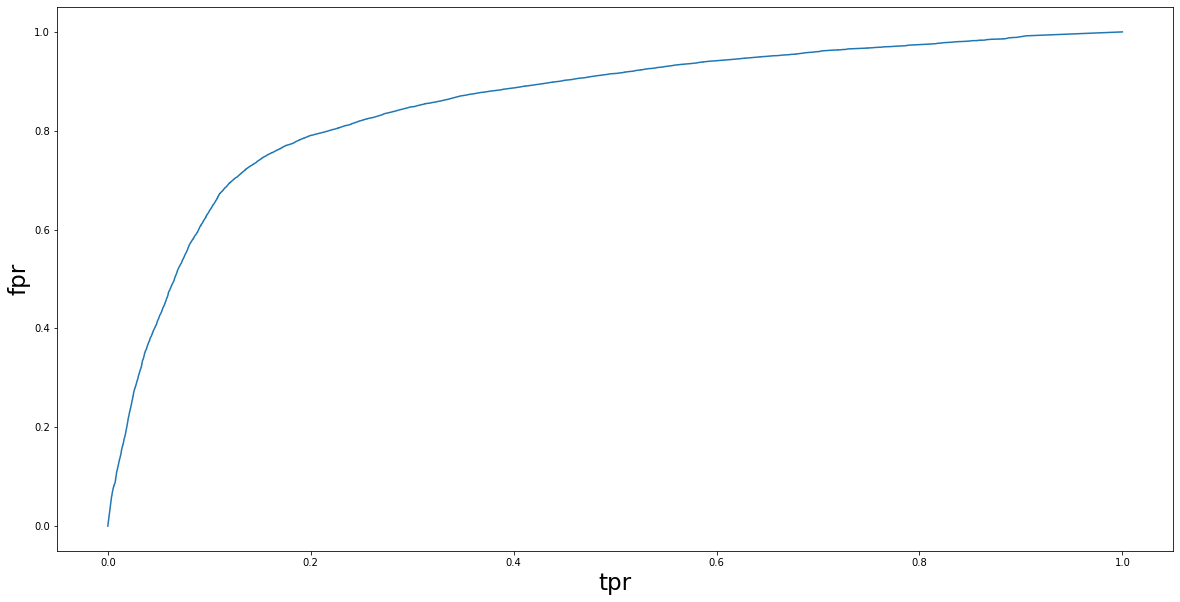

In [8]:
show_classification_result(classification_result)

Добавим по 5 соседей с каждой стороны.

In [14]:
NEIGHBOURS_NUM = 5

In [15]:
neighbours_feature_vector, _ = pack_neighbours(feature_vector, NEIGHBOURS_NUM)
features = neighbours_feature_vector.features
features = features.reshape(len(features), -1)
neighbours_feature_vector = FeatureVector(
    features=features, 
    target=neighbours_feature_vector.target[:, NEIGHBOURS_NUM], 
    pdb_ids=neighbours_feature_vector.pdb_ids)

In [16]:
neighbours_classification_result = group_k_fold(make_model, neighbours_feature_vector)

(array([0.9000937 , 0.76687989]), array([0.8864921 , 0.79144254]), array([0.89324112, 0.77896763]), array([8669, 4090]))
(array([0.90563611, 0.78839753]), array([0.89693109, 0.80426874]), array([0.90126258, 0.79625405]), array([8635, 4123]))
(array([0.8959397 , 0.82646086]), array([0.90351845, 0.81407472]), array([0.89971312, 0.82022103]), array([8157, 4604]))
(array([0.9065135 , 0.82044561]), array([0.90024272, 0.83078965]), array([0.90336723, 0.82558523]), array([8240, 4521]))
(array([0.90643072, 0.83418429]), array([0.91994366, 0.80919811]), array([0.9131372 , 0.82150126]), array([8519, 4240]))


precision_recall_fscore_support
(array([0.90295409, 0.8076479 ]), array([0.90135007, 0.81045509]), array([0.90215137, 0.80904906]), array([42220, 21578]))


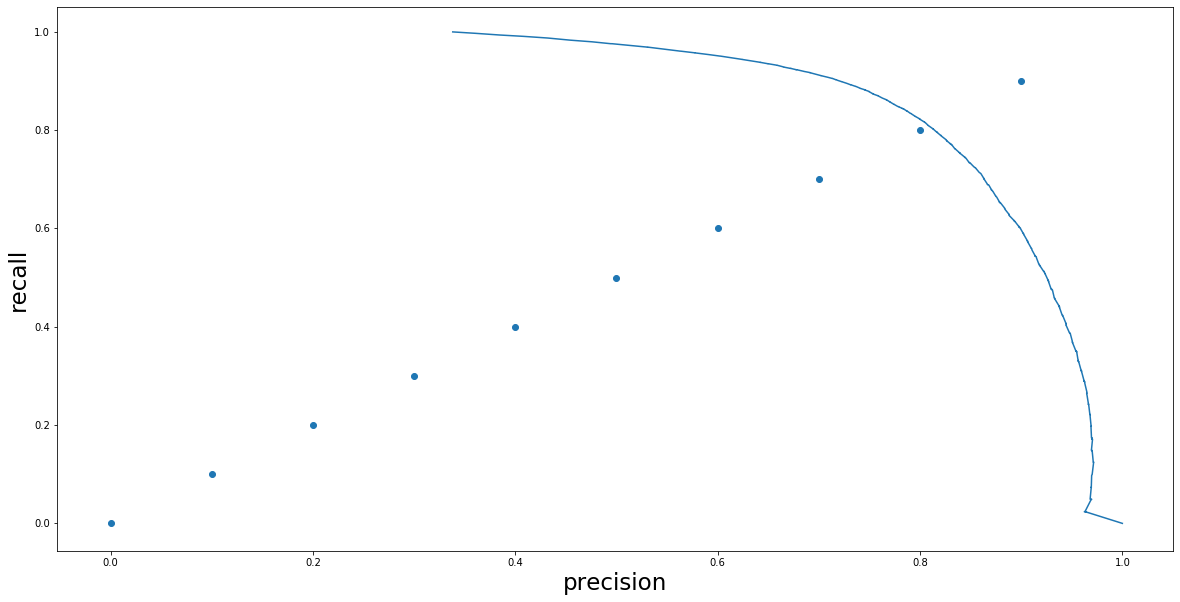

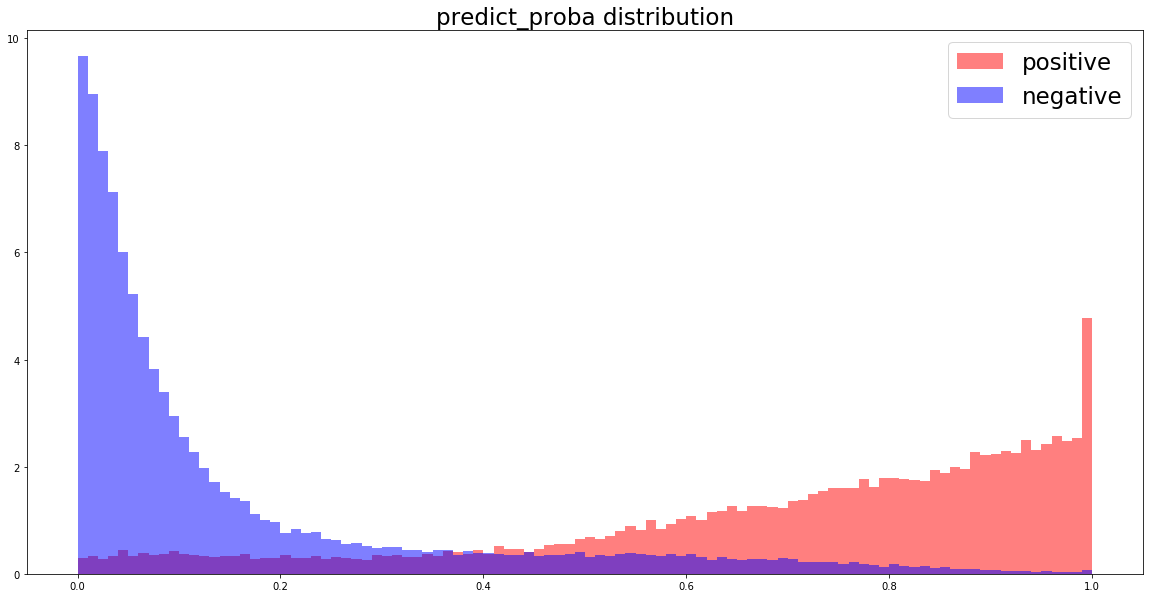

roc auc
0.9303901823966803


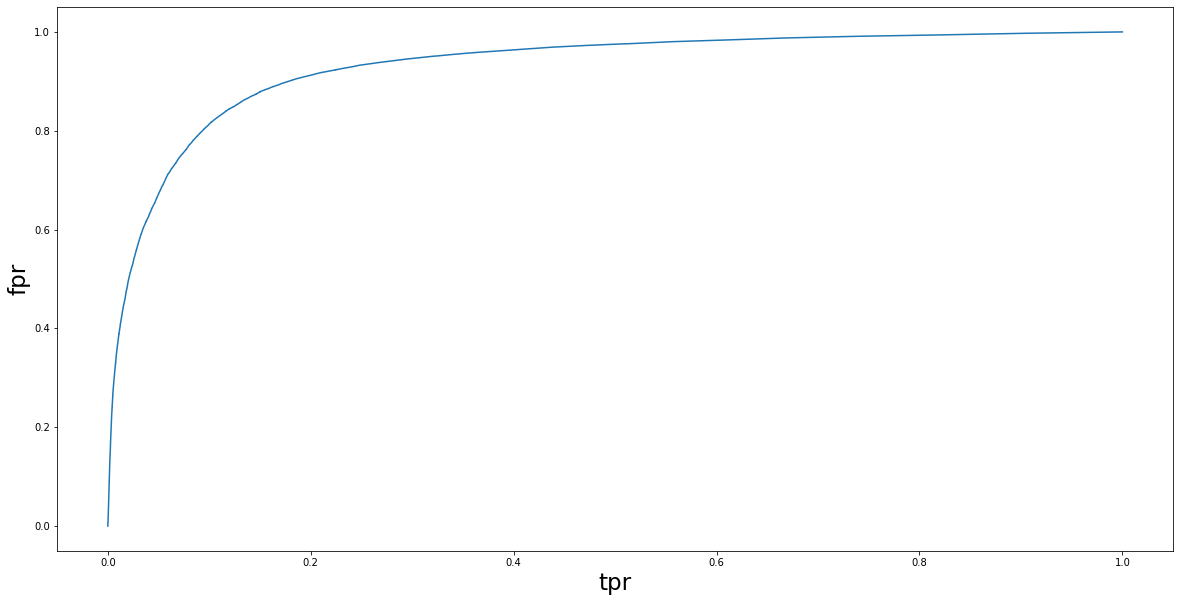

In [17]:
show_classification_result(neighbours_classification_result)

In [18]:
NEIGHBOURS_NUM = 10

In [19]:
neighbours_feature_vector, _ = pack_neighbours(feature_vector, NEIGHBOURS_NUM)
features = neighbours_feature_vector.features
features = features.reshape(len(features), -1)
neighbours_feature_vector = FeatureVector(
    features=features, 
    target=neighbours_feature_vector.target[:, NEIGHBOURS_NUM], 
    pdb_ids=neighbours_feature_vector.pdb_ids)

In [20]:
neighbours_10_classification_result = group_k_fold(make_model, neighbours_feature_vector)

(array([0.89988638, 0.75714286]), array([0.87848164, 0.79493147]), array([0.88905519, 0.77557714]), array([8114, 3867]))
(array([0.90869128, 0.78949988]), array([0.89530999, 0.81358974]), array([0.90195101, 0.80136381]), array([8081, 3900]))
(array([0.88899047, 0.82882258]), array([0.90194779, 0.80825626]), array([0.89542226, 0.81841023]), array([7547, 4433]))
(array([0.90785557, 0.83870209]), array([0.91092066, 0.83360598]), array([0.90938553, 0.83614627]), array([7701, 4279]))
(array([0.90289693, 0.83997968]), array([0.92017233, 0.80895303]), array([0.91145278, 0.82417445]), array([7892, 4088]))


Посмотрим на разницу precision/recall кривых. Без соседей -- синяя кривая, с соседями -- рыжая

precision_recall_fscore_support
(array([0.87552102, 0.69704663]), array([0.84369884, 0.74987482]), array([0.85931542, 0.72249633]), array([45809, 21969]))
precision_recall_fscore_support
(array([0.90295409, 0.8076479 ]), array([0.90135007, 0.81045509]), array([0.90215137, 0.80904906]), array([42220, 21578]))
precision_recall_fscore_support
(array([0.90172984, 0.81118881]), array([0.90115673, 0.81217484]), array([0.90144319, 0.81168153]), array([39335, 20567]))


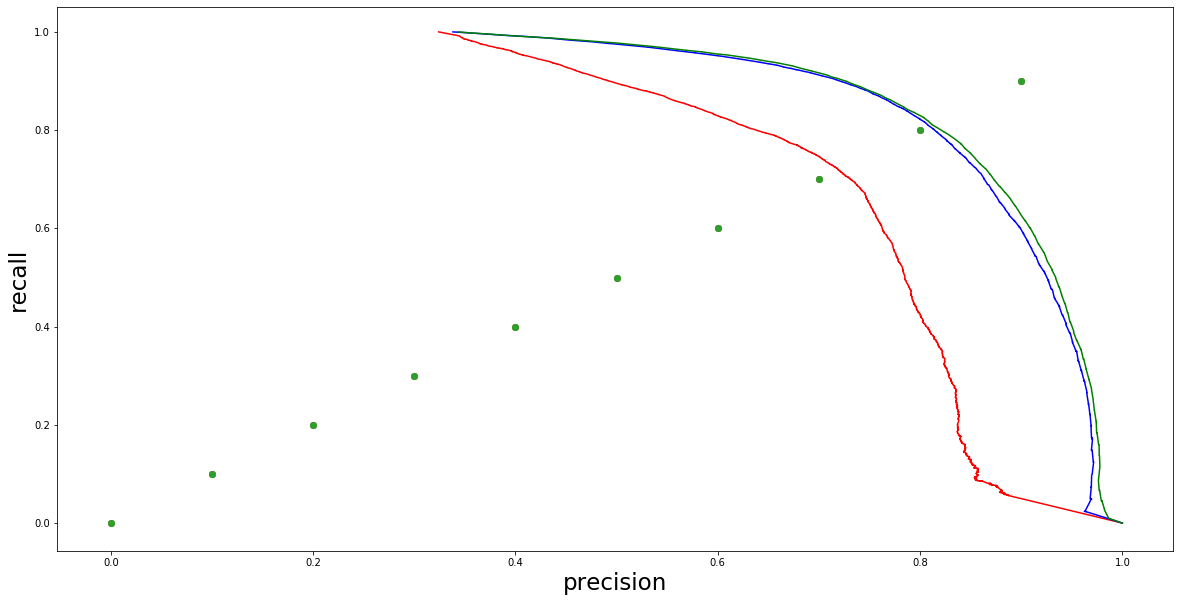

In [22]:
plt.figure(figsize=(20, 10))

plot_precision_recall_curve(classification_result, c='r');
plot_precision_recall_curve(neighbours_classification_result, c='b');
plot_precision_recall_curve(neighbours_10_classification_result, c='g');

Вывод: добавление соседей сильно помогает